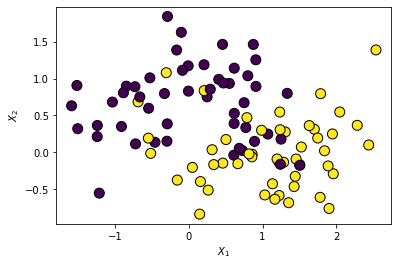

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_moon_data():
    X,y=make_moons(n_samples=150,noise=0.4,random_state=42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)
    return [X_train,X_test,y_train,y_test]

X_train,X_test,y_train,y_test=get_moon_data()

plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train,s=100,edgecolors='k')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


clf=LogisticRegression(penalty="l2",C=0.5)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

f1=f1_score(y_test,y_pred)
print("f1 score is "+str(f1))

f1 score is 0.7499999999999999


In [3]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

cm=confusion_matrix(y_test,y_pred)

tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
(tn,fp,fn,tp)

(20, 5, 7, 18)

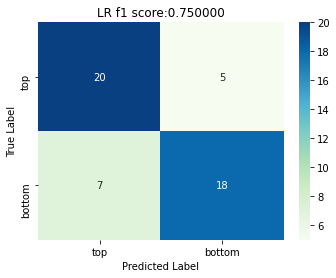

In [4]:
labels=['top','bottom']
df_cm=pd.DataFrame(cm,index=labels,columns=labels)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,cmap='GnBu',annot=True)

plt.title("LR f1 score:{0:3f}".format(f1_score(y_test,y_pred)))
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.show()

In [5]:
from sklearn.svm import SVC


clf=SVC(kernel='linear',C=0.5)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
f1=f1_score(y_test,y_pred)
print("f1 score is "+str(f1))

f1 score is 0.7499999999999999


In [6]:
clf2=SVC(gamma=2,C=1)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)
f1=f1_score(y_test,y_pred)
print("f1 score is "+str(f1))

f1 score is 0.782608695652174


In [17]:
# ID:1912360
# NAME: ANCHAERIN

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=6,random_state=42)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
f1=f1_score(y_test,y_pred)
print("f1 score is "+str(f1))

f1 score is 0.7234042553191491


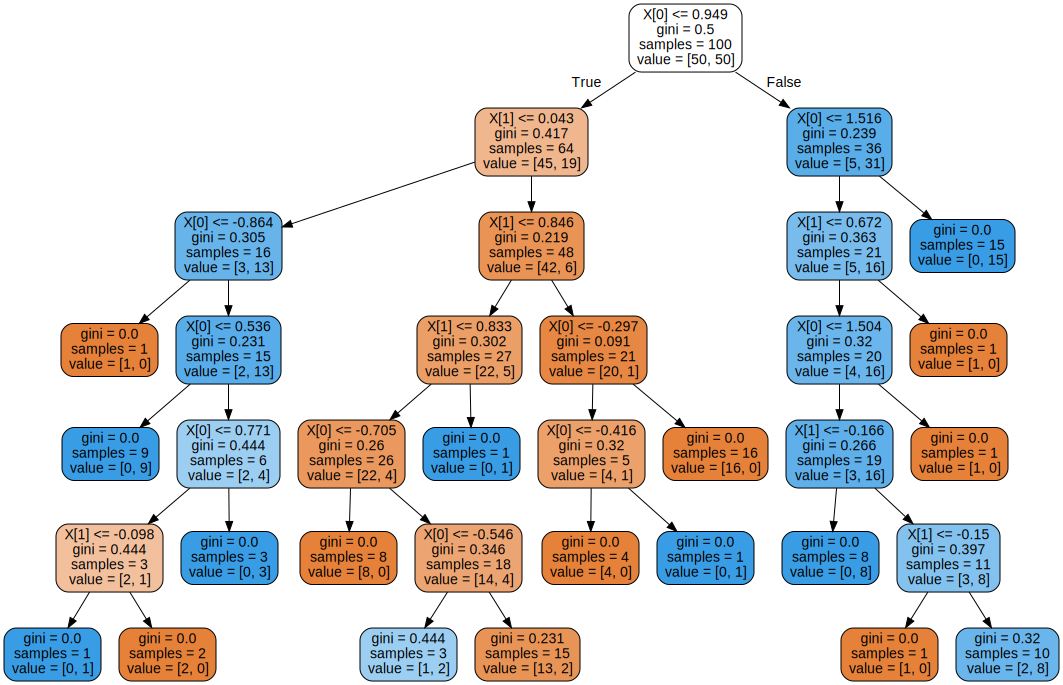

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(clf,out_file=("moon_tree.dot"),rounded=True,filled=True)

import graphviz
with open("moon_tree.dot") as f:
    dot_graph=f.read()
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='moon_tree',cleanup=True)
dot

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(max_depth=4,n_estimators=10,max_features='sqrt',random_state=42,oob_score=True)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
f1=f1_score(y_test,y_pred)
print("f1 score is "+str(f1))

oob_score=clf.oob_score_
print('OOB score is '+str(oob_score))

f1 score is 0.7659574468085107
OOB score is 0.73
